In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Bridge.csv', index_col='Date', parse_dates=True)
df.columns = ['Total', 'East', 'West']
df.head()

,Total,East,West
Date,,,
2012-10-02 13:00:00,55,48,7
2012-10-02 14:00:00,130,75,55
2012-10-02 15:00:00,152,71,81
2012-10-02 16:00:00,278,111,167
2012-10-02 17:00:00,563,170,393


           Total       East       West
Date                                  
0     147.375000  76.208333  71.166667
1     155.400000  72.342857  83.057143
2     140.750000  71.000000  69.750000
3     135.875000  68.479167  67.395833
4     109.255319  54.702128  54.553191
5      83.583333  45.000000  38.583333
6      89.250000  49.625000  39.625000


<Axes: >

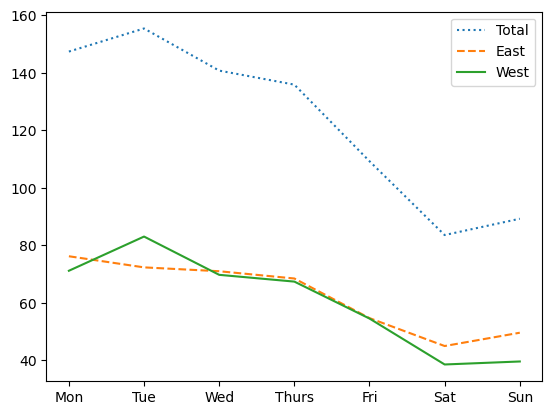

In [5]:
#(i)
by_weekday=df.groupby(df.index.dayofweek).mean()
print(by_weekday)
by_weekday.index=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

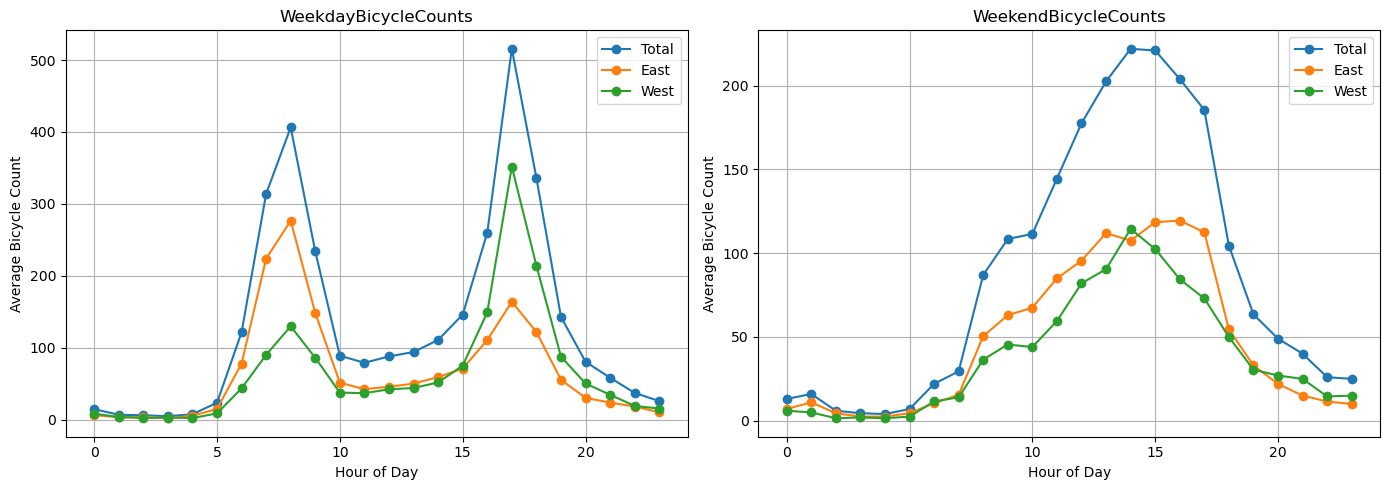

In [6]:
#(ii)
import numpy as np
weekend_array=np.where(df.index.dayofweek<5,'Weekday','Weekend')
by_time=df.groupby([weekend_array,df.index.hour]).mean()
fig,ax=plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0],title='WeekdayBicycleCounts',marker='o')
by_time.loc['Weekend'].plot(ax=ax[1],title='WeekendBicycleCounts',marker='o')

for a in ax:
    a.set_xlabel('Hour of Day')
    a.set_ylabel('Average Bicycle Count')
    a.grid(True)
plt.tight_layout()
plt.show()